## Notebook to make a comparison between two regression methods

The regression between atmospheric variables and sea level for the cmip6 data has been performed in two different ways.

With the trend included as a forcing parameter in the regression

With the time series detrended before the regression

Here, both results are compared

In [18]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

lowess = sm.nonparametric.lowess
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Projections/code')

import import_data as imprt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import data

In [19]:
wind_contr_hist_np

model,ACCESS-CM2,ACCESS-ESM1-5,CAMS-CSM1-0,CMCC-CM2-SR5,CNRM-CM6-1,CanESM5,CanESM5-CanOE,EC-Earth3-Veg-LR,GFDL-CM4,GFDL-ESM4,MPI-ESM1-2-HR,MRI-ESM2-0,NESM3,NorCPM1
time,,,,,,,,,,,,,,
1850,0.461084,3.391498,-1.940102,-2.966263,-2.928256,-1.346386,-0.264104,4.602799,1.490426,-0.333611,-0.625437,-0.116241,1.821936,-1.135798
1851,2.127769,2.409561,0.852817,0.156132,-0.211193,0.587997,0.229816,-0.091277,0.616425,-1.885525,-0.324543,-2.124371,-3.939729,-0.955742
1852,3.428783,2.208626,-0.949847,0.870810,-2.439178,-2.272608,-1.949043,-1.005404,1.022308,0.214903,-2.335841,-0.651649,-3.473078,0.968362
1853,-0.359886,3.455889,-0.069393,-0.740374,1.222226,-2.581141,-1.384317,0.832620,-0.616904,-1.102835,-1.153394,2.928445,-0.937952,-0.342998
1854,1.500166,0.872725,-1.281686,-3.001222,2.379833,-1.058860,-0.901654,1.357332,2.920089,-2.568035,-0.980631,-2.646545,-2.948426,0.717846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,-0.741294,0.749058,0.019101,-1.207140,-0.878436,-2.619585,-3.010013,-0.407884,2.752165,-0.816510,-4.236544,-0.037666,2.029722,-1.126824
2011,-1.065424,-1.349685,-0.654400,0.547844,0.223460,-3.057530,-1.777924,-3.222619,-0.904462,-0.904958,-0.056470,-0.029611,3.817755,1.873148
2012,0.882871,1.127703,1.405354,3.561191,-1.896669,-2.410094,1.843370,-0.784180,3.996238,-1.503849,0.095179,-0.967212,-0.507407,1.038062


In [20]:
# Open data file
wind_contr_hist_np = imprt.import_cmip6_wind_contribution_data()
wind_contr_hist_tim = imprt.import_cmip6_wind_contribution_data(wind_model = 'Timmerman')
wind_contr_hist_da = imprt.import_cmip6_wind_contribution_data(wind_model = 'Dangendorf')


# Create dataframe
wind_contr_hist_np = wind_contr_hist_np.wind_total.to_pandas().T
wind_contr_hist_tim = wind_contr_hist_tim.wind_total.to_pandas().T
wind_contr_hist_da = wind_contr_hist_da.wind_total.to_pandas().T

# Import regression coefficients and coefficients of determination
results_np = imprt.import_cmip6_regression_results()
results_tim = imprt.import_cmip6_regression_results(wind_model = 'Timmerman')
results_da = imprt.import_cmip6_regression_results(wind_model = 'Dangendorf')
    

In [21]:
# Import historical wind contribution from pre_projection_regression
wind_contr_hist_pp_np = imprt.import_cmip6_wind_contribution_data_preproj()
wind_contr_hist_pp_tim = imprt.import_cmip6_wind_contribution_data_preproj(wind_model = 'Timmerman')
wind_contr_hist_pp_da = imprt.import_cmip6_wind_contribution_data_preproj(wind_model = 'Dangendorf')


# Import regression coefficients and coefficients of determination
path_reg_results = '/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Data/cmip6/Regression results/Projections/'
results_pp_np = pd.read_csv(path_reg_results + f'NearestPoint_results.csv', index_col = 'result')
results_pp_tim = pd.read_csv(path_reg_results + f'Timmerman_results.csv', index_col = 'result')
results_pp_da = pd.read_csv(path_reg_results + f'Dangendorf_results.csv', index_col = 'result')



### Comparison with all models

In [22]:
def plot_result(results1, results2, var1, var2, name, title, wind_model = 'NearestPoint', whichmodels = 'allmodels'):
    plt.figure(figsize=(0.42*results1.columns.size,4))

    for i, model in enumerate(results1.columns):
        if i == 0:
            plt.scatter(model, results1[model][var1], marker = 'x', color = 'tab:orange', label = 'Trend as forcing parameter')
            plt.scatter(model, results2[model][var2], marker = 'x', color = 'tab:blue', label = 'Forcing parameters detrended')
        else:
            plt.scatter(model, results1[model][var1], marker = 'x', color = 'tab:orange')
            plt.scatter(model, results2[model][var2], marker = 'x', color = 'tab:blue')
    plt.xticks(rotation=90) 
    plt.ylim(0,0.8)
    plt.grid()
    plt.legend(loc='upper left')
    plt.title(f'{title} - {wind_model}')
    plt.ylabel(f'{name} [-]')
    plt.tight_layout()

    plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Regression trend comparison/{name}_{wind_model}_{whichmodels}')

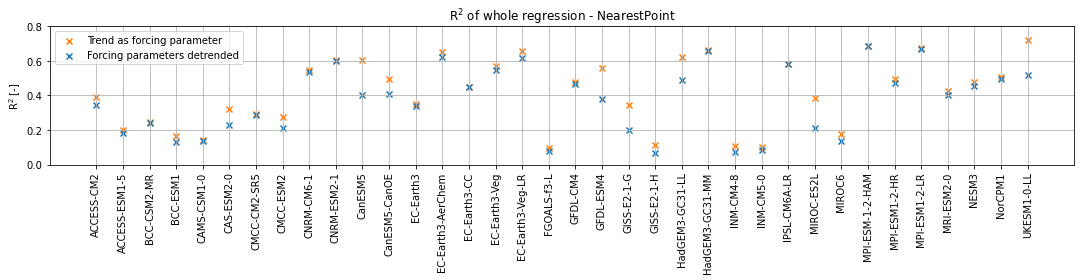

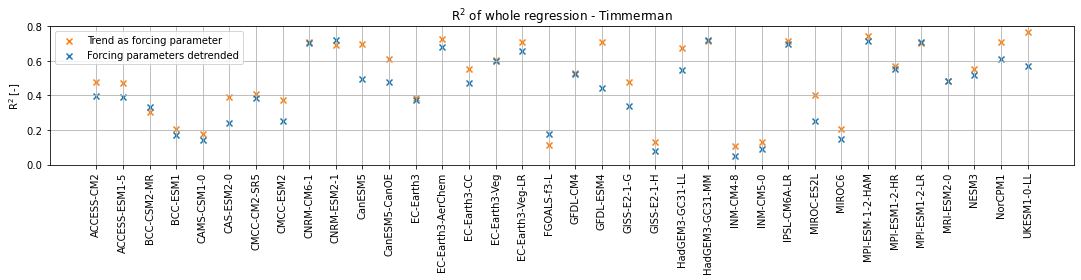

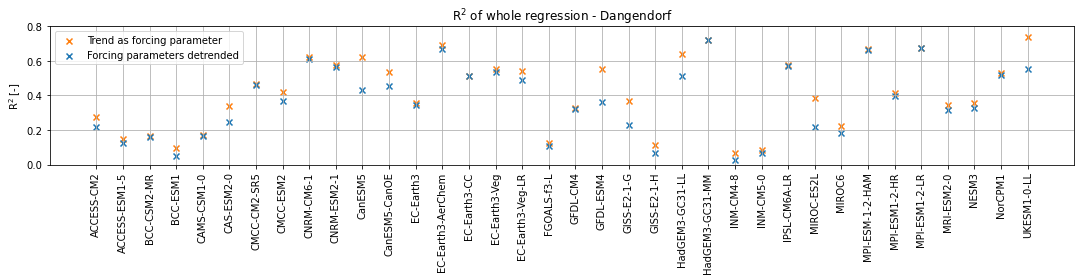

In [23]:
plot_result(results_np, results_pp_np, 'r2', 'R$^2$', 'R$^2$', 'R$^2$ of whole regression')
plot_result(results_tim, results_pp_tim, 'r2', 'R$^2$', 'R$^2$', 'R$^2$ of whole regression', wind_model = 'Timmerman')
plot_result(results_da, results_pp_da, 'r2', 'R$^2$', 'R$^2$', 'R$^2$ of whole regression', wind_model = 'Dangendorf')

Results are very similar for the three different multiple regression models and overall the regression performs better when the trend is a forcing parameter.

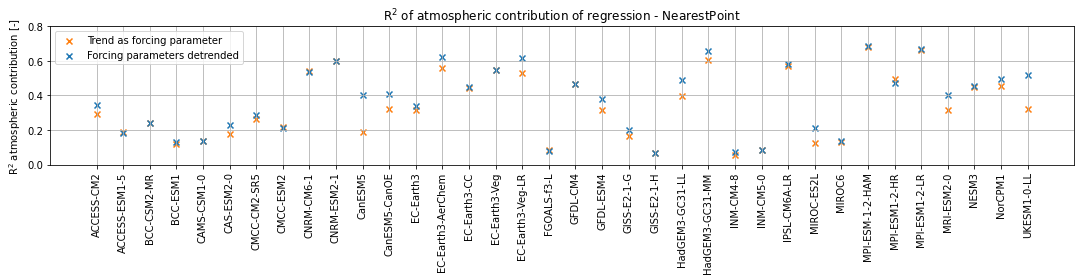

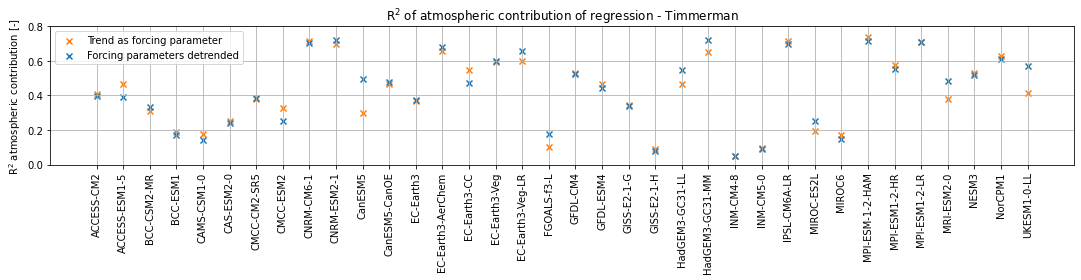

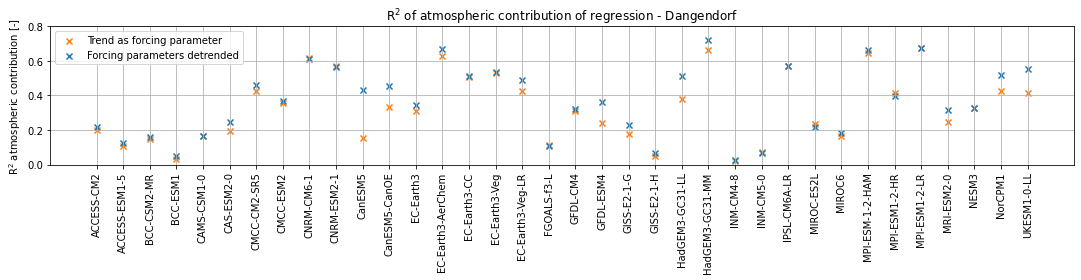

In [24]:
plot_result(results_np, results_pp_np, 'r2_wind', 'R$^2$', 'R$^2$ atmospheric contribution', 'R$^2$ of atmospheric contribution of regression')
plot_result(results_tim, results_pp_tim, 'r2_wind', 'R$^2$', 'R$^2$ atmospheric contribution', 'R$^2$ of atmospheric contribution of regression', wind_model = 'Timmerman')
plot_result(results_da, results_pp_da, 'r2_wind', 'R$^2$', 'R$^2$ atmospheric contribution', 'R$^2$ of atmospheric contribution of regression', wind_model = 'Dangendorf')

Again, the three different multiple regression models perform alike. Now, the atmospheric contribution is overall highest when the forcing parameters are detrended and the trend is not a forcing parameter in the regression.

In [25]:
wind_contr = [wind_contr_hist_np, wind_contr_hist_tim, wind_contr_hist_da]
wind_contr_pp = [wind_contr_hist_pp_np, wind_contr_hist_pp_tim, wind_contr_hist_pp_da]
wind_labels = ['NearestPoint', 'Timmerman', 'Dangendorf']

def plot_time_series(wind_contrs1, wind_contrs2, whichmodels = 'allmodels'):
    window = 21
    
    models = wind_contrs1[0].columns
    
    n_col = 3
    n_row = models.size
    
    y_min = -4
    y_max = 5
    
    fig, axs = plt.subplots(n_row, n_col, figsize=(20, 3*n_row))
    
    
    for i in range(n_row):

        for j in range(n_col):
            
            ax = axs[i,j]
            
            frac = window/wind_contrs1[j][models[i]].values.size
            model_lowess = lowess(wind_contrs1[j][models[i]].values, wind_contrs1[j].index.values, frac, return_sorted=False)
            ax.plot(wind_contrs1[j].index.values, model_lowess, color = 'tab:orange', label = 'Trend as forcing parameter')
            
            frac = window/wind_contrs2[j][models[i]].values.size
            model_lowess = lowess(wind_contrs2[j][models[i]].values, wind_contrs2[j].index.values, frac, return_sorted=False)
            ax.plot(wind_contrs1[j].index.values, model_lowess, color = 'tab:blue', label = 'Forcing parameters detrended')
            
            ax.axhline(color='darkgray', linestyle='-', linewidth = 1)  
            ax.set_title(wind_labels[j] + '\n' + models[i])
            ax.set_ylim(y_min, y_max)
            if j == 2:
                ax.legend()
            
            if j == 0:
                ax.set_ylabel(f'atmospheric contribution to zos [cm]')
            if i == n_row - 1:
                ax.set_xlabel('time [y]')
                
    plt.tight_layout()
    plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Regression trend comparison/all_smoothed_timeseries_{whichmodels}')

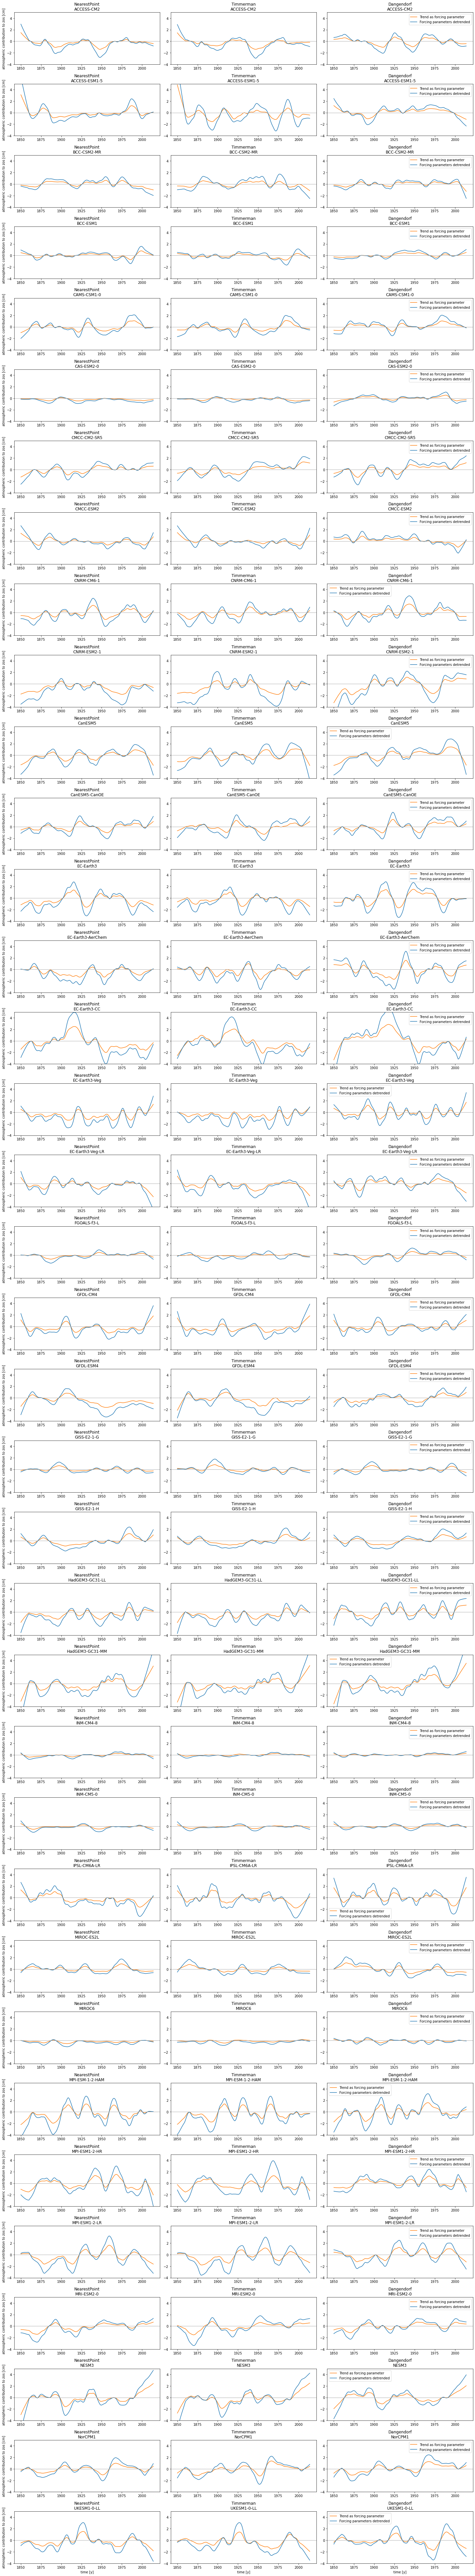

In [26]:
plot_time_series(wind_contr, wind_contr_pp)

Overall, the amplitude is larger if the forcing parameters are detrended and the trend is not a forcing parameter in the regression.

In [27]:
def plot_se(wind_contr1, wind_contr2, wind_model = 'NearestPoint', whichmodels = 'allmodels'):
    
    plt.figure(figsize=(0.42*wind_contr1.columns.size,4))
    
    for i, model in enumerate(wind_contr1.columns):
        if i == 0:
            plt.scatter(model, np.std(wind_contr1[model]), marker = 'x', color = 'tab:orange', label = 'Trend as forcing parameter')
            plt.scatter(model, np.std(wind_contr2[model]), marker = 'x', color = 'tab:blue', label = 'Forcing parameters detrended')
        else:
            plt.scatter(model, np.std(wind_contr1[model]), marker = 'x', color = 'tab:orange')
            plt.scatter(model, np.std(wind_contr2[model]), marker = 'x', color = 'tab:blue')
    plt.xticks(rotation=90) 
    plt.ylim(0,7)
    plt.grid()
    plt.legend(loc='upper left')
    plt.title(wind_model)
    plt.ylabel(f'Standard deviation [cm]')
    plt.tight_layout()

    plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Regression trend comparison/stddev_{wind_model}_{whichmodels}')

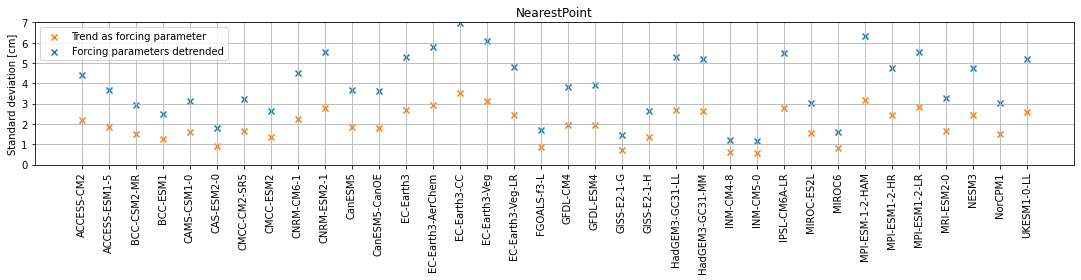

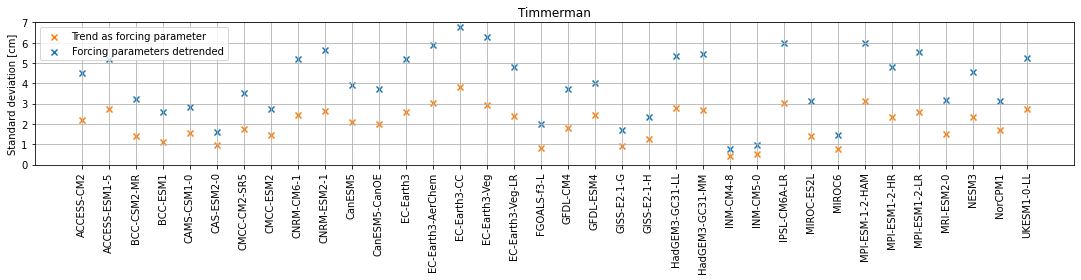

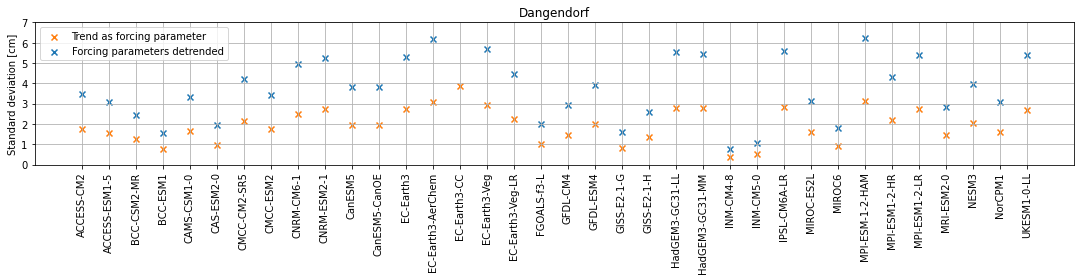

In [28]:
plot_se(wind_contr_hist_np, wind_contr_hist_pp_np)
plot_se(wind_contr_hist_tim, wind_contr_hist_pp_tim, wind_model = 'Timmerman')
plot_se(wind_contr_hist_da, wind_contr_hist_pp_da, wind_model = 'Dangendorf')

Standard deviation is always larger for the regression with detrended forcing parameters

### Comparison with best models

In [29]:
# Import best models
path_best_models = '/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Data/cmip6/Comparison results/'
models = []

# Source: https://stackabuse.com/reading-and-writing-lists-to-a-file-in-python/
# open file and read the content in a list
with open(path_best_models+'bestmodels.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]

        # add item to the list
        models.append(currentPlace)

In [30]:
# Select models
wind_contr_hist_np = wind_contr_hist_np[models]
wind_contr_hist_tim = wind_contr_hist_tim[models]
wind_contr_hist_da = wind_contr_hist_da[models]

results_np = results_np[models]
results_tim = results_tim[models]
results_da = results_da[models]


wind_contr_hist_pp_np = wind_contr_hist_pp_np[models]
wind_contr_hist_pp_tim = wind_contr_hist_pp_tim[models]
wind_contr_hist_pp_da = wind_contr_hist_pp_da[models]

results_pp_np = results_pp_np[models]
results_pp_tim = results_pp_tim[models]
results_pp_da = results_pp_da[models]
    

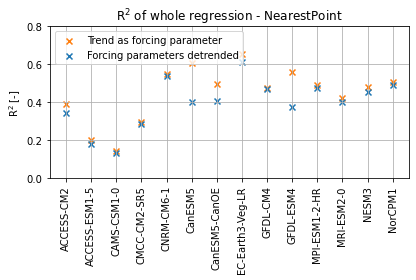

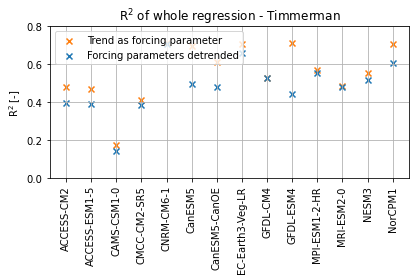

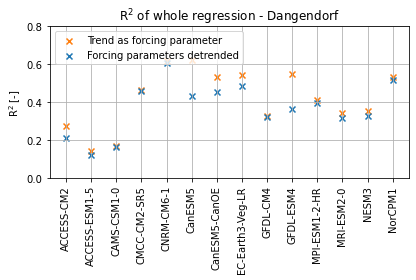

In [31]:
plot_result(results_np, results_pp_np, 'r2', 'R$^2$', 'R$^2$', 'R$^2$ of whole regression', whichmodels = 'bestmodels')
plot_result(results_tim, results_pp_tim, 'r2', 'R$^2$', 'R$^2$', 'R$^2$ of whole regression', wind_model = 'Timmerman', whichmodels = 'bestmodels')
plot_result(results_da, results_pp_da, 'r2', 'R$^2$', 'R$^2$', 'R$^2$ of whole regression', wind_model = 'Dangendorf', whichmodels = 'bestmodels')

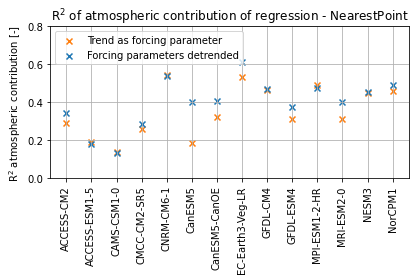

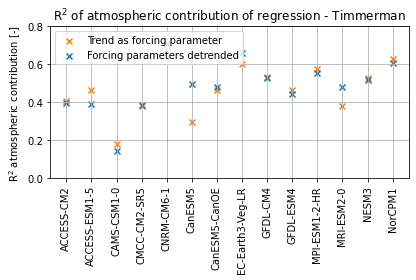

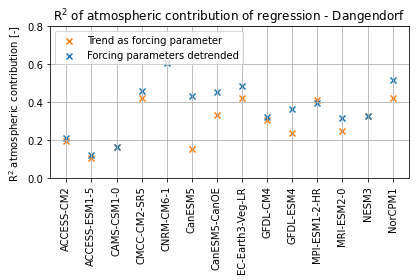

In [32]:
plot_result(results_np, results_pp_np, 'r2_wind', 'R$^2$', 'R$^2$ atmospheric contribution', 
            'R$^2$ of atmospheric contribution of regression', whichmodels = 'bestmodels')
plot_result(results_tim, results_pp_tim, 'r2_wind', 'R$^2$', 'R$^2$ atmospheric contribution', 
            'R$^2$ of atmospheric contribution of regression', wind_model = 'Timmerman', whichmodels = 'bestmodels')
plot_result(results_da, results_pp_da, 'r2_wind', 'R$^2$', 'R$^2$ atmospheric contribution', 
            'R$^2$ of atmospheric contribution of regression', wind_model = 'Dangendorf', whichmodels = 'bestmodels')

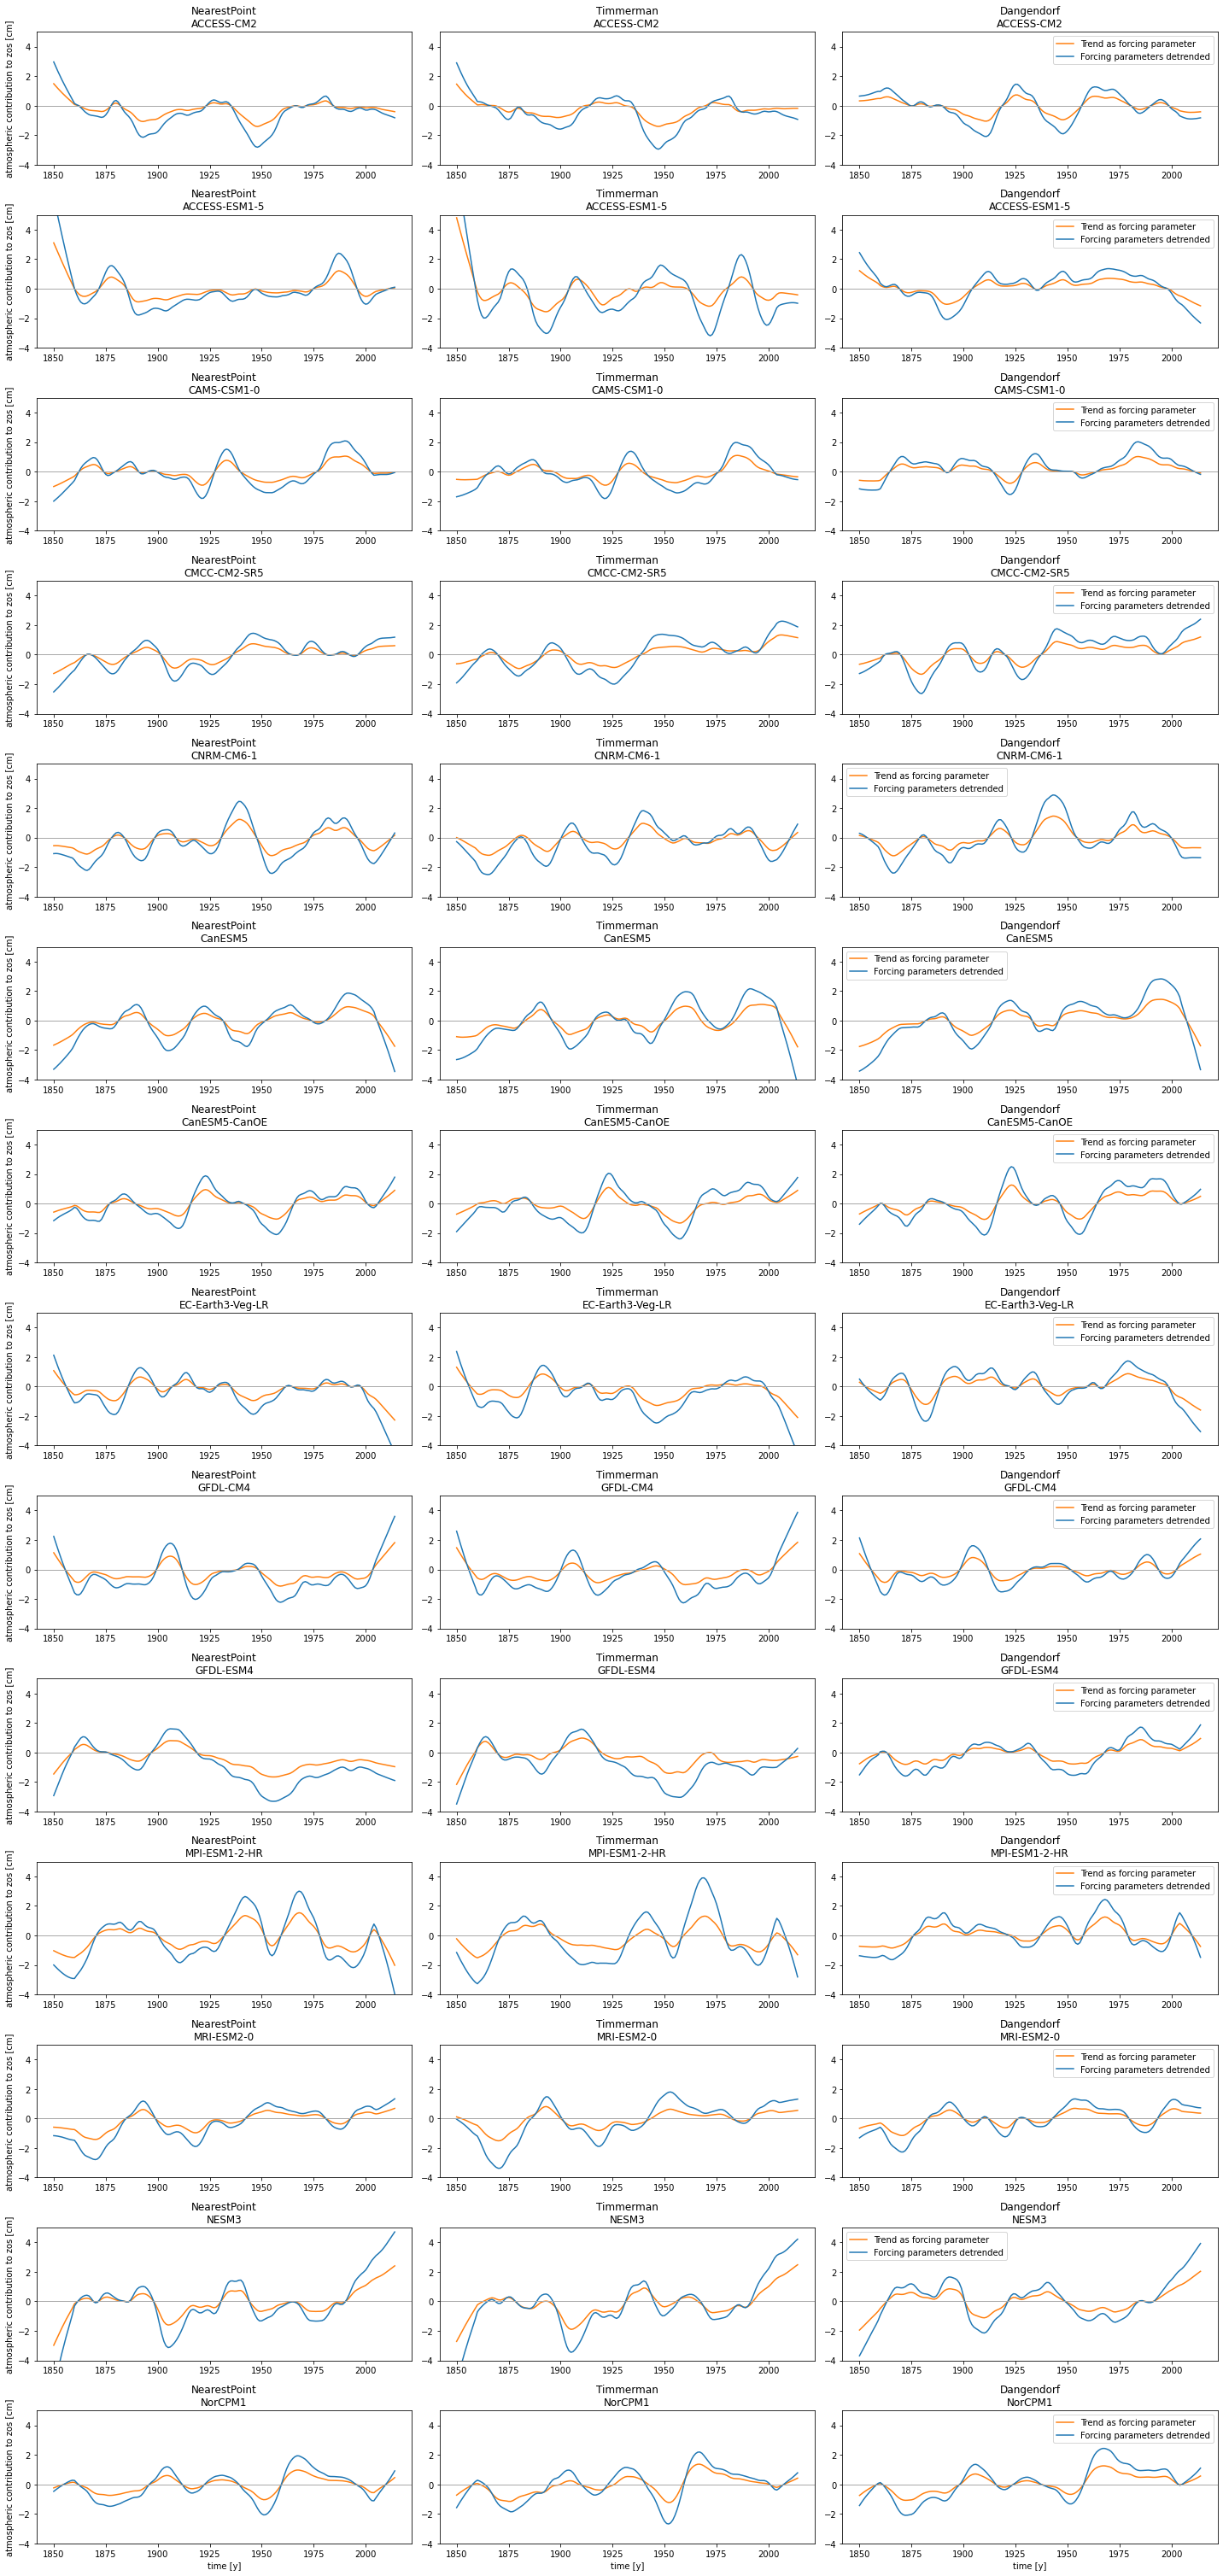

In [33]:
wind_contr = [wind_contr_hist_np, wind_contr_hist_tim, wind_contr_hist_da]
wind_contr_pp = [wind_contr_hist_pp_np, wind_contr_hist_pp_tim, wind_contr_hist_pp_da]

plot_time_series(wind_contr, wind_contr_pp, whichmodels = 'bestmodels')

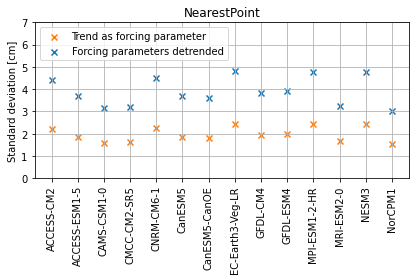

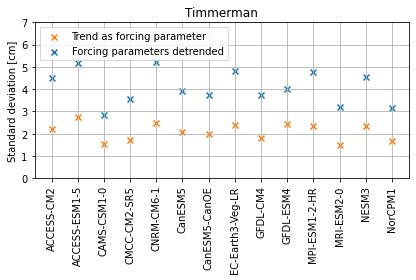

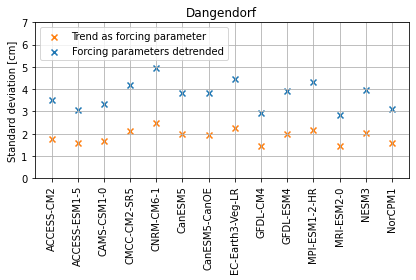

In [34]:
plot_se(wind_contr_hist_np, wind_contr_hist_pp_np, whichmodels = 'bestmodels')
plot_se(wind_contr_hist_tim, wind_contr_hist_pp_tim, wind_model = 'Timmerman', whichmodels = 'bestmodels')
plot_se(wind_contr_hist_da, wind_contr_hist_pp_da, wind_model = 'Dangendorf', whichmodels = 'bestmodels')